# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("В некоторых алгоритмах есть рандомные составляющие, генерации распределений, обычных чисел и тд.")
print('Некоторые оптимизационные алгоритмы имеют такие составляющие и не только,')
print('поэтому для чистоты эксперимента, для удобства повторения и воспроизводства (и проверки преподавателями и ассистентами нужно фиксить сид')

В некоторых алгоритмах есть рандомные составляющие, генерации распределений, обычных чисел и тд.
Некоторые оптимизационные алгоритмы имеют такие составляющие и не только,
поэтому для чистоты эксперимента, для удобства повторения и воспроизводства (и проверки преподавателями и ассистентами нужно фиксить сид


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [ ]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [ ]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [ ]:
df_train.describe(include='all').fillna('-')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.0,6999.0,6999.0,6999,6999,6999,6999,6797,6797,6803,6796,6797.0
unique,1924,-,-,-,4,3,2,5,386,120,316,419,-
top,Maruti Swift Dzire VDI,-,-,-,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,-
freq,116,-,-,-,3793,5826,6095,4587,197,885,330,468,-
mean,-,2013.818403,639515.197171,69584.615517,-,-,-,-,-,-,-,-,5.419008
std,-,4.053095,808941.911915,57724.001817,-,-,-,-,-,-,-,-,0.965767
min,-,1983.0,29999.0,1.0,-,-,-,-,-,-,-,-,2.0
25%,-,2011.0,254999.0,35000.0,-,-,-,-,-,-,-,-,5.0
50%,-,2015.0,450000.0,60000.0,-,-,-,-,-,-,-,-,5.0
75%,-,2017.0,675000.0,97000.0,-,-,-,-,-,-,-,-,5.0


In [ ]:
df_test.describe(include='all').fillna('-')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.0,1000.0,1000.0,1000,1000,1000,1000,981,981,981,981,981.0
unique,621,-,-,-,4,3,2,5,237,88,182,226,-
top,Maruti Alto 800 LXI,-,-,-,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,-
freq,15,-,-,-,534,837,877,623,23,116,43,57,-
mean,-,2013.681,617901.042,71393.341,-,-,-,-,-,-,-,-,5.410805
std,-,4.012149,758553.86071,48486.218662,-,-,-,-,-,-,-,-,0.919985
min,-,1995.0,31000.0,1303.0,-,-,-,-,-,-,-,-,4.0
25%,-,2011.0,250000.0,37000.0,-,-,-,-,-,-,-,-,5.0
50%,-,2014.0,434999.0,61500.0,-,-,-,-,-,-,-,-,5.0
75%,-,2017.0,670000.0,100000.0,-,-,-,-,-,-,-,-,5.0


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

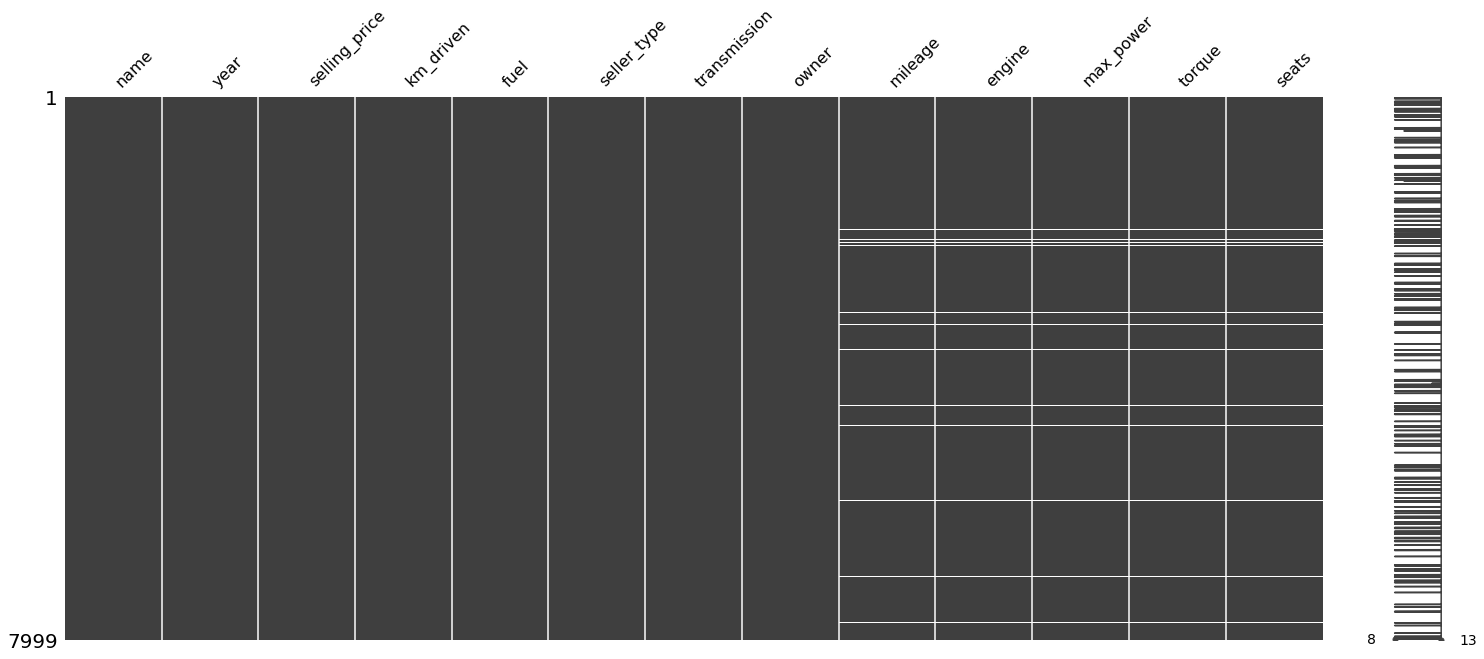

In [ ]:
import missingno as ms
ms.matrix(
    pd.concat([df_train, df_test])
    )

В колонках километража, двигателя, мощности, крут. момент и кол-во сидений

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
dupdif = len(
    df_train
    ) - len(
        df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns)
        )
print(f"Признаковые дубликаты есть, их {dupdif}")

Признаковые дубликаты есть, их 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [ ]:
df_train[~df_train.index.isin(df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns).index)].sort_values(by='km_driven')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6537,Maruti Swift LXI,2020,445000,1000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
4484,Honda Amaze S i-VTEC,2019,690000,1303,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1198 CC,86.7 bhp,109Nm@ 4500rpm,5.0
1594,Honda Amaze S i-VTEC,2019,690000,1303,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1198 CC,86.7 bhp,109Nm@ 4500rpm,5.0
2786,Honda Amaze S i-VTEC,2019,690000,1303,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1198 CC,86.7 bhp,109Nm@ 4500rpm,5.0
6310,Honda Jazz VX CVT,2019,840000,1500,Petrol,Individual,Automatic,First Owner,18.2 kmpl,1199 CC,88.7 bhp,110Nm@ 4800rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6436,Mitsubishi Lancer 2.0 GLd,1999,150000,198000,Diesel,Individual,Manual,Second Owner,14.8 kmpl,1998 CC,68 bhp,"12.5@ 3,000(kgm@ rpm)",5.0
6865,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,200Nm@ 1400-3400rpm,7.0
5365,Toyota Innova 2.5 V Diesel 7-seater,2011,700000,250000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
6846,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,200Nm@ 1400-3400rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns,
                         keep = 'first', 
                         inplace = True)

In [ ]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [ ]:
df_train.reset_index(drop=True,
                     inplace=True)

In [ ]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [ ]:
import re
#а мама говорила мне, учи регулярки.......
def measures(stri):
    if (stri is not None) or (not pd.isna(stri)):
        try:
            #получаем единицы измерения
            #оставляем буквы
            ress = re.sub("[^a-zA-Z]+", " ", stri.lower()).strip(' ').replace('at', '')
            trq = 'nm'
            #особый случай когда указано и в кгм и в нм
            if ('kgm' in ress) and ('nm' in ress):
                trq = 'nm'
            else:           
                #если только один элемент, то всегда указано в нм (проверено вручную)
                if len(ress.split(' ')) == 1:
                    trq = 'nm'
                #если получается больше, то первый элемент после сплита будет измерением
                else:
 
                    trq = ress.split(' ')[0]

            return trq
        except:
            return stri

    else:
        return(np.nan)

def measures_numbers(stringg):
    if (stringg is not None) or (not pd.isna(stringg)) or str(stringg) != 'nan':
        stringg = str(stringg).replace('at', '')\
        .replace('/', '')\
        .replace('@', '')\
        .lower()
        measure = measures(stringg)
        #NM
        if measure == 'nm':
            if len(stringg.split(measure)) == 1:
                if stringg.split(measure)[0] == 'nan':
                    return np.nan
                else:
                    nm = stringg.split(measure)[0].split(' ')[0]
                    rpm = stringg.split(measure)[0].split(' ')[-1].replace('rpm', '')\
                    .split('-')[-1]
            else:
                try:
                    nm = float(stringg.split(measure)[0])
                    rpm = float(stringg.split(measure)[-1].replace('rpm', '').split('-')[-1])
                except:
                    if stringg.split(measure)[-1] == '':
                        nm = float(stringg.split(measure)[0])
                        rpm = np.nan
                    else:
                        try:
                            nm = float(stringg.split(measure)[0])
                            rpm = stringg.split(measure)[-1].replace('rpm', '')\
                            .replace(',', '')\
                            .split(' ')
                            if len(rpm) == 2:
                                rpm = float(rpm[1].split('~')[-1].split('-')[-1])
                            elif len(rpm) == 4:
                                rpm = float(rpm[2].split('~')[-1].split('-')[-1])
                        except:
                            nm = float(stringg.split(measure)[0].split(' ')[0])
                            rpm = float(stringg.split(measure)[0].split(' ')[-1].replace(',', '').split('+')[0])
        #KGM
        else:
            try:
                nm = stringg.split(measure)[0]
                rpm = stringg.split(measure)[1].replace('rpm', '').replace(',', '')\
                .split('-')[-1]
                nm = round(float(nm) / 0.10197162129779283, 1)
                rpm = float(rpm)

            except:
                nm = round(float(stringg.split(measure)[0].split(' ')[0])  / 0.10197162129779283, 1)
                rpm = float(stringg.split(measure)[0].split(' ')[1].replace(',', '')\
                .split('-')[-1].replace('(', ''))

        return nm, rpm
    
    
    else:
        return np.nan, np.nan






def isna_mod(numb):
    try:
        return float(str(numb).split(' ')[0])

    except ValueError:
        
        return np.nan


def pochinim(df):
    df_local = df

    df_local['mileage'] = df_local['mileage'].apply(lambda x: isna_mod(x))

    df_local['engine'] = df_local['engine'].apply(lambda x: isna_mod(x))

    df_local['max_power'] = df_local['max_power'].apply(lambda x: isna_mod(x))

    
    df_local['nm'] = df_local['torque'].apply(lambda x: measures_numbers(x)).str[0]
    df_local['rpm'] = df_local['torque'].apply(lambda x: measures_numbers(x)).str[1]
    df_local['nm'] = df_local['nm'].replace({'110(11.2)':110}).astype(float)
    df_local['rpm'] = df_local['rpm'].astype(float)
    df_local.drop(columns=['torque'], inplace=True)
    return df_local

df_train = pochinim(df_train)
df_test = pochinim(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [ ]:
df_train['nm'].fillna(df_train['nm'].quantile(0.5), inplace = True)
df_test['nm'].fillna(df_test['nm'].quantile(0.5), inplace = True)
df_train['rpm'].fillna(df_train['rpm'].quantile(0.5), inplace = True)
df_test['rpm'].fillna(df_test['rpm'].quantile(0.5), inplace = True)

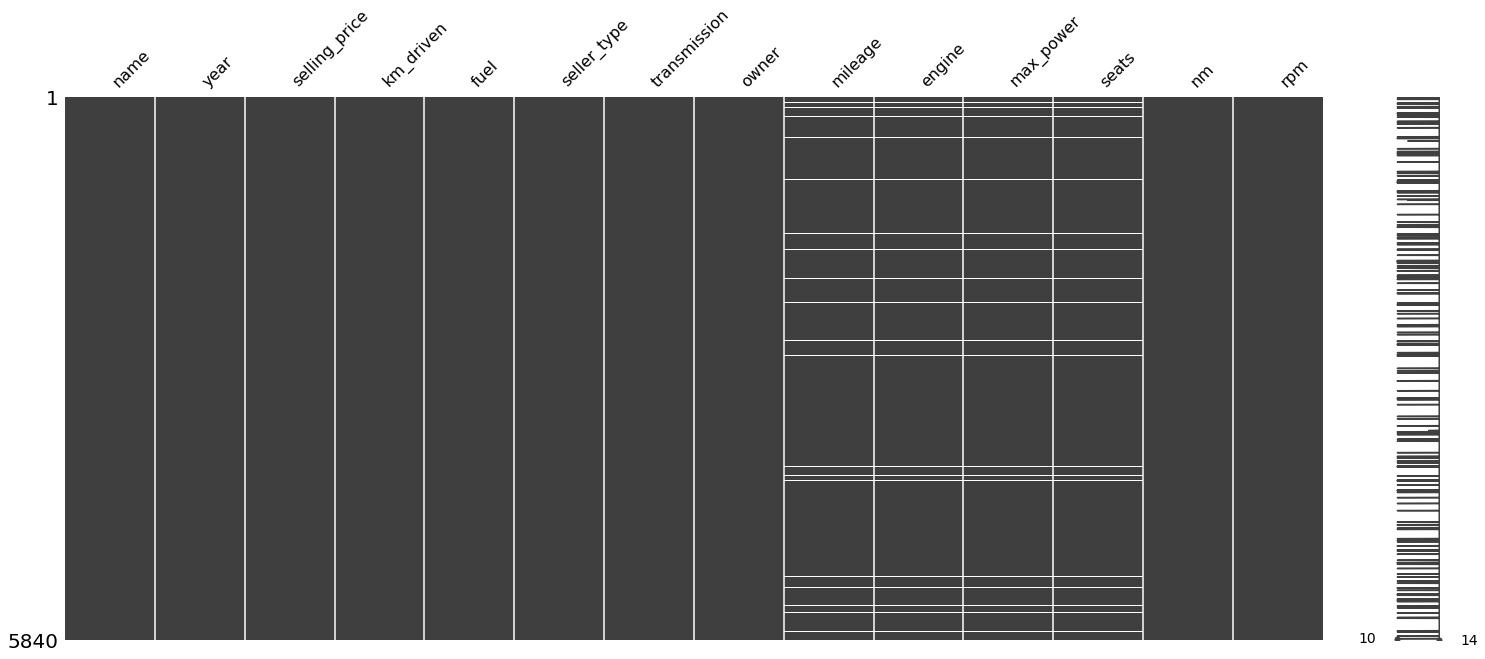

In [ ]:
ms.matrix(df_train)

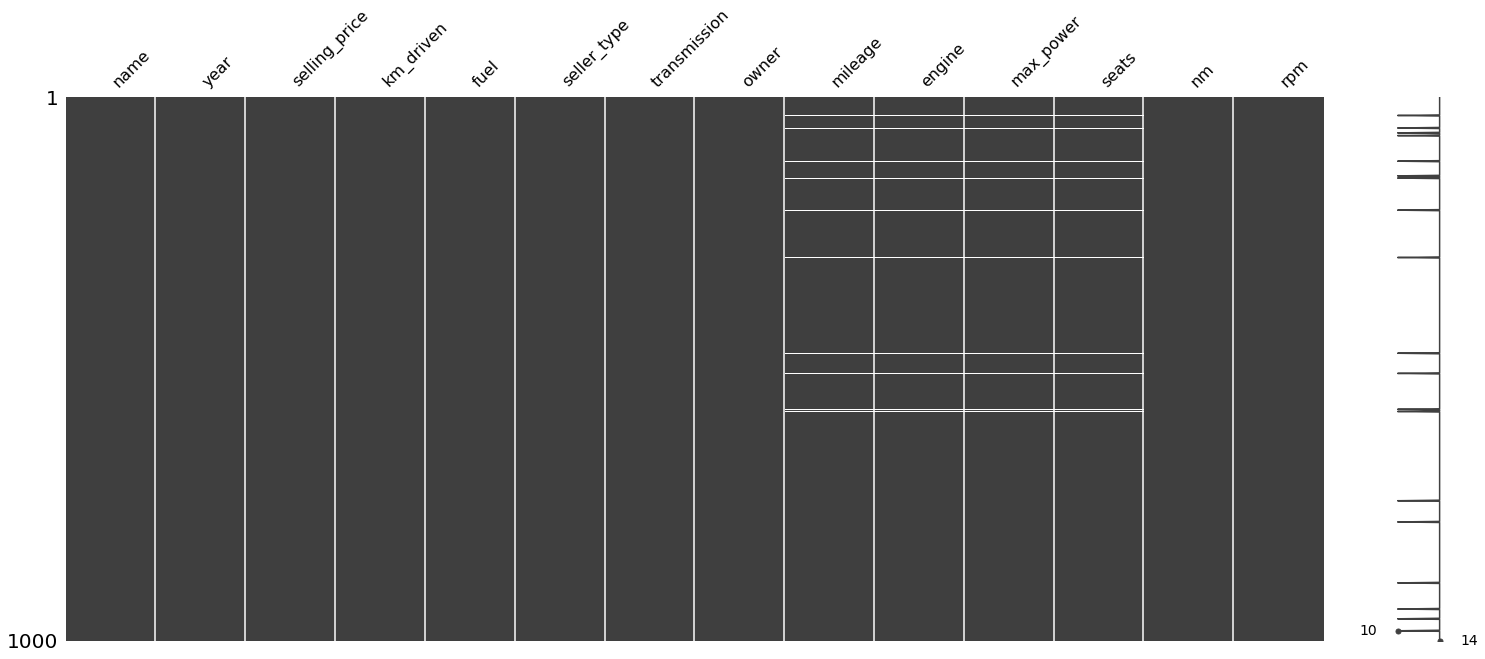

In [ ]:
ms.matrix(df_test)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [ ]:
print("Это целое число, кол-во сидений по факту и есть категория, которая может показывать категорию машины, кузова")
print("С численной же точки зрения, если не сделать категориальной, то будет считать кол-во сидений непрерывной областью")
print("а на деле это категория, т.к. целое число и не много категорий")

Это целое число, кол-во сидений по факту и есть категория, которая может показывать категорию машины, кузова
С численной же точки зрения, если не сделать категориальной, то будет считать кол-во сидений непрерывной областью
а на деле это категория, т.к. целое число и не много категорий


In [ ]:
df_train['engine'] = df_train['engine'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_train['seats'] = df_train['seats'].astype(float)
df_test['seats'] = df_test['seats'].astype(float)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

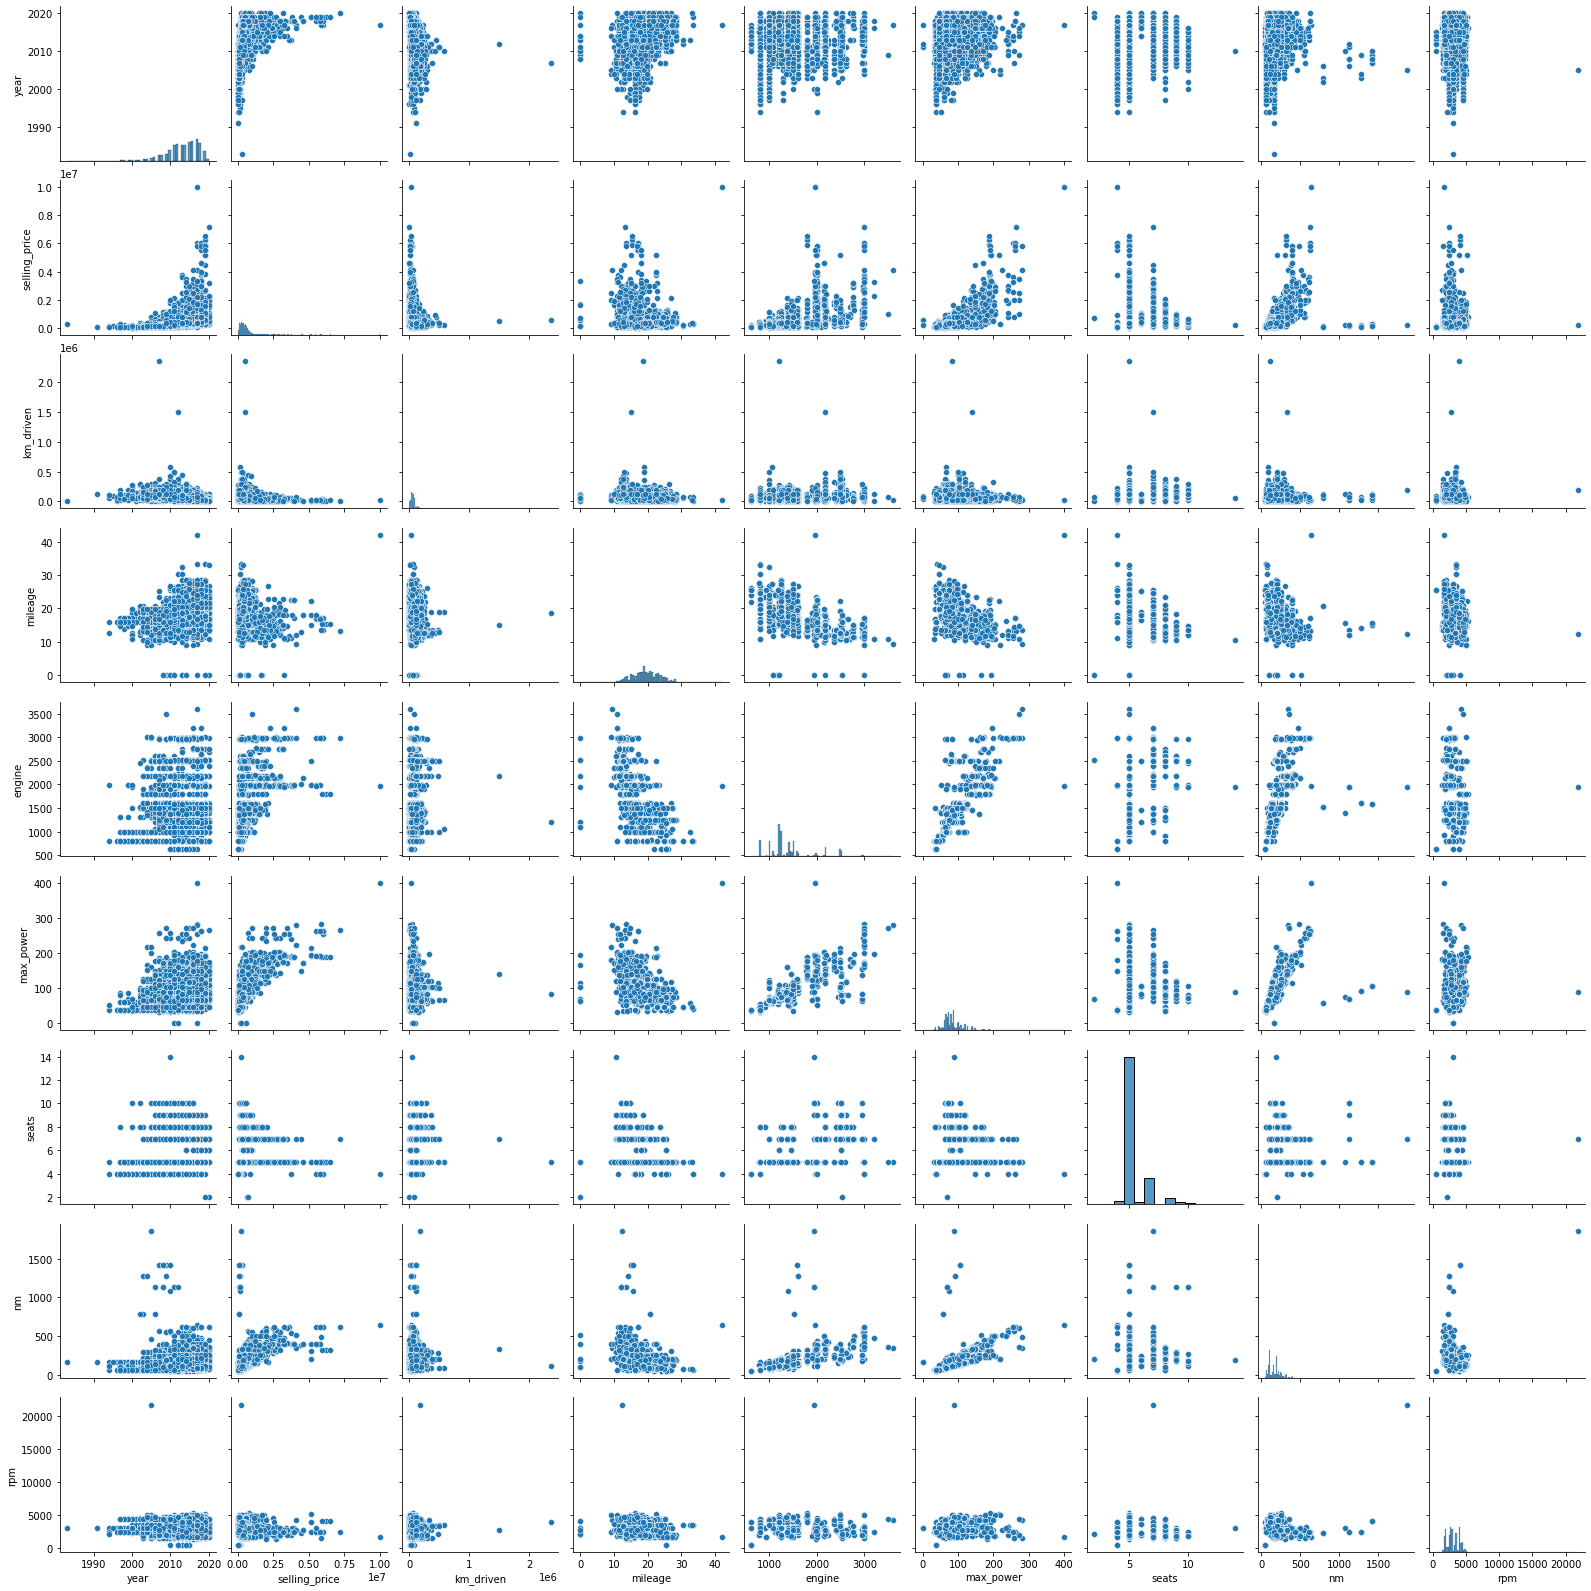

In [ ]:
sns.pairplot(df_train.drop(columns = ['name', 'seller_type', 'transmission', 'owner']))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [ ]:
print('из графика кстати видно, что sets - категориальная')
print('когда на скаттерплоте точки в столбцы встают значит она категориальная, кк возможно и engine')
print('-------------------------------------------')
print('у технических показателей много зависимостей, лошадки, ньютон метры и тд. только обороты живут своей жизнью')
print('при этом как будто бы year и km_driven можно повертеть, прологарифмировать и тд, зависимость есть, но нелинейная (относительно целевой)')
print('ещё намеки на зависимость с целевой есть у двигателя, мощности и силы')

из графика кстати видно, что sets - категориальная
когда на скаттерплоте точки в столбцы встают значит она категориальная, кк возможно и engine
-------------------------------------------
у технических показателей много зависимостей, лошадки, ньютон метры и тд. только обороты живут своей жизнью
при этом как будто бы year и km_driven можно повертеть, прологарифмировать и тд, зависимость есть, но нелинейная (относительно целевой)
ещё намеки на зависимость с целевой есть у двигателя, мощности и силы


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

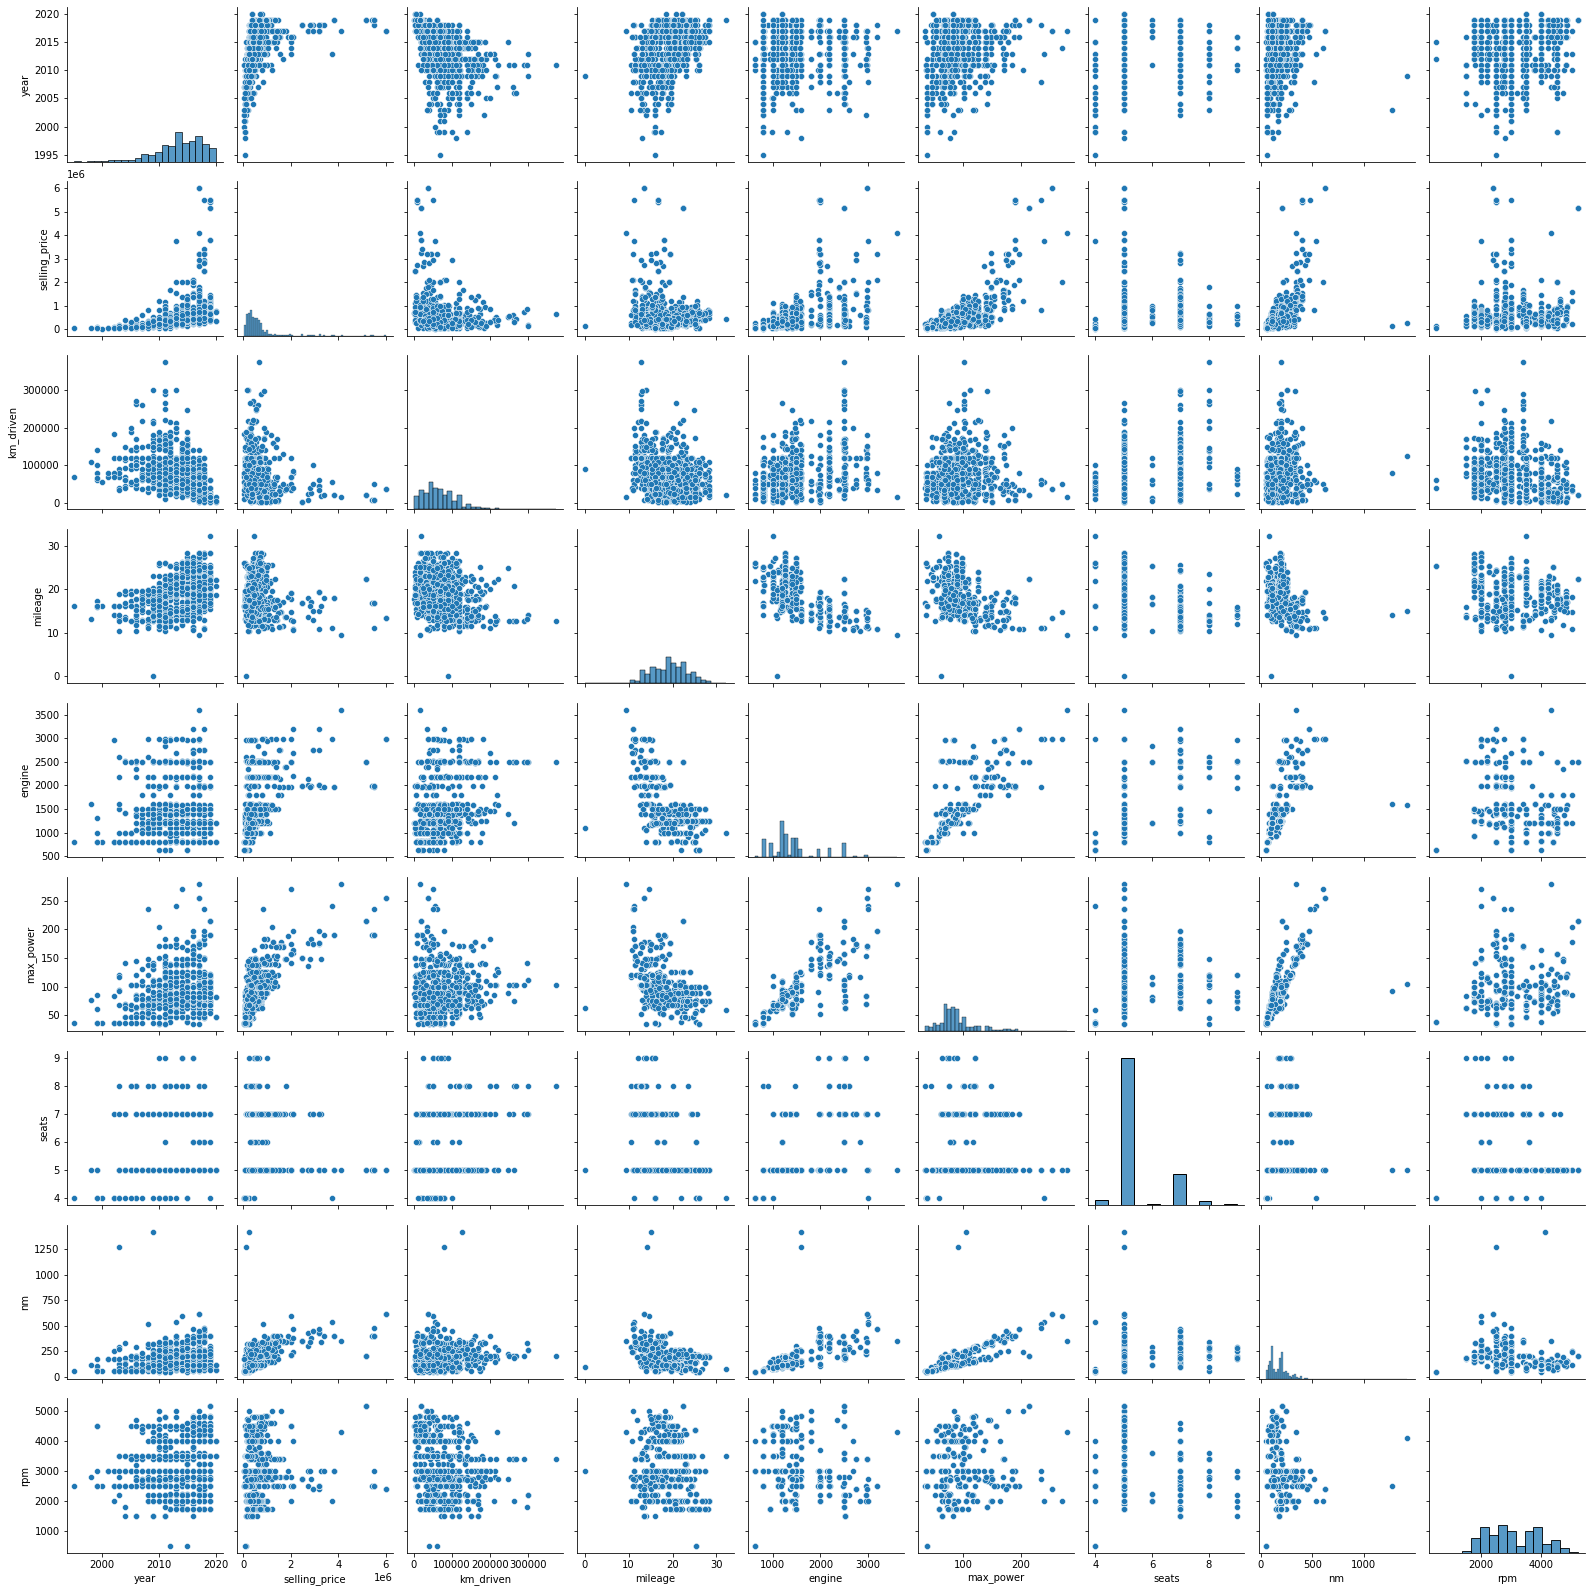

In [ ]:
sns.pairplot(df_test.drop(columns = ['name', 'seller_type', 'transmission', 'owner']))

In [ ]:
print('Впринципе, зависимости с целевой сохранились те же, но как будто меньше выбросов, фичи уже распределены')

Впринципе, зависимости с целевой сохранились те же, но как будто меньше выбросов, фичи уже распределены


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

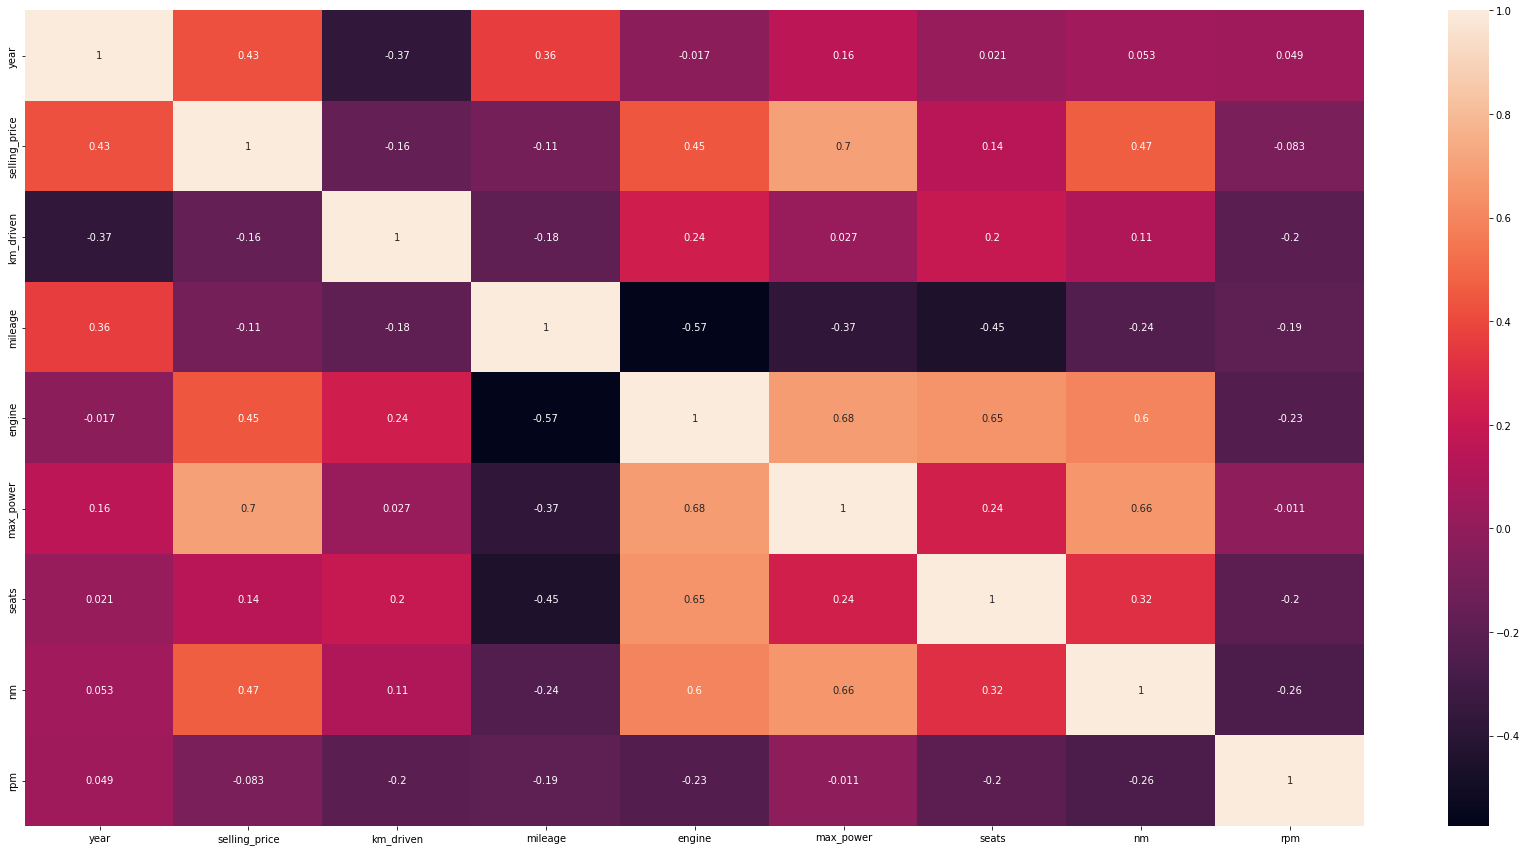

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df_train.drop(columns = ['name', 'seller_type', 'transmission', 'owner']).corr(),
            annot = True)

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.70,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.80,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90.00,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,235.40,2750.0


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [ ]:
print('1) max_power и rpm')
print('2) selling_price(max_power) & engine(max_power) и пр. тех показатели, как уже было сказано из паирплота')
print('3) ну исходя из отрицательнй корреляции - да, чем меньше год, тем больше километраж')
print('при этом надо быть аккуратным, т.к. корреляция не такая и большая по модулю')

1) max_power и rpm
2) selling_price(max_power) & engine(max_power) и пр. тех показатели, как уже было сказано из паирплота
3) ну исходя из отрицательнй корреляции - да, чем меньше год, тем больше километраж
при этом надо быть аккуратным, т.к. корреляция не такая и большая по модулю


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

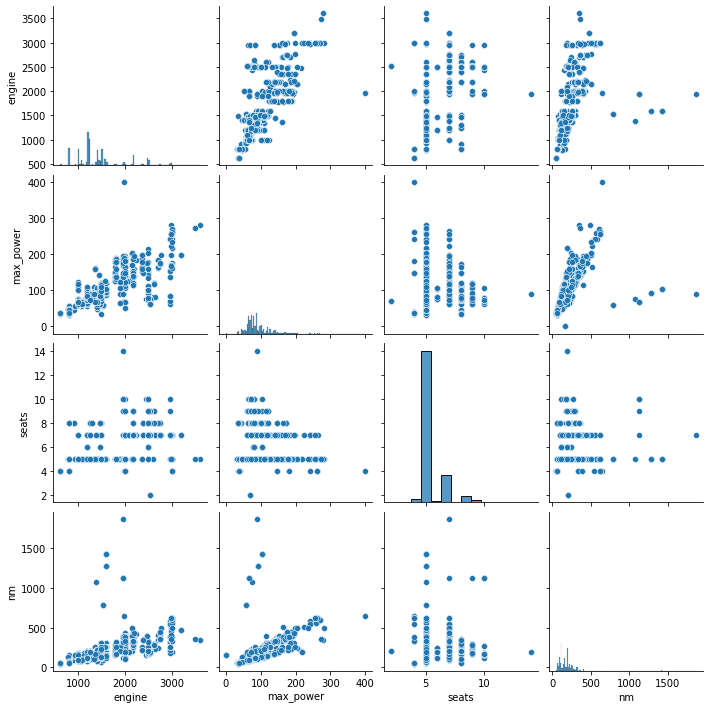

In [ ]:
sns.pairplot(df_train[['engine', 'max_power', 'seats', 'nm']])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Доля от Датасета 0.76


<Figure size 432x288 with 0 Axes>

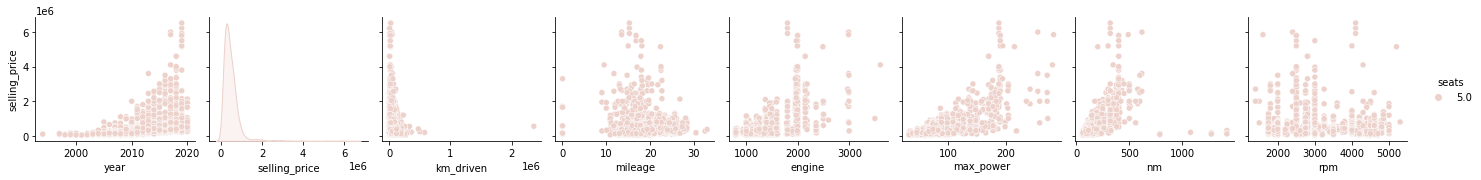

Доля от Датасета 0.14


<Figure size 432x288 with 0 Axes>

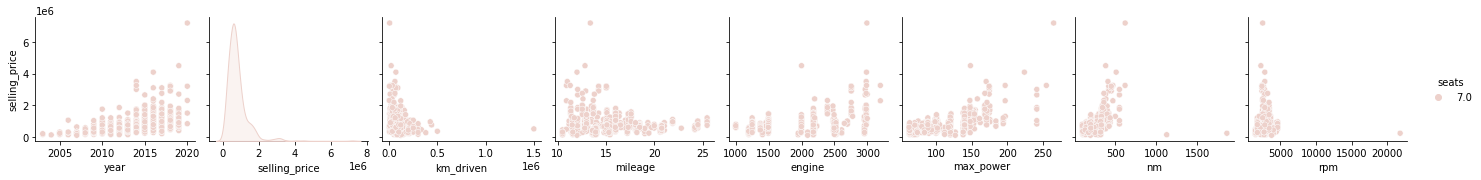

Доля от Датасета 0.03


<Figure size 432x288 with 0 Axes>

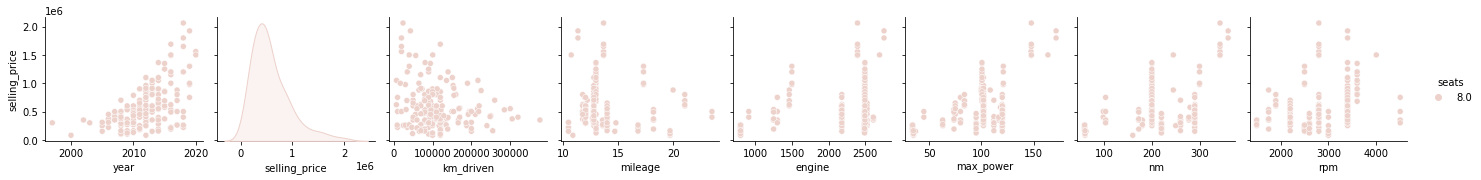

Доля от Датасета 0.02


<Figure size 432x288 with 0 Axes>

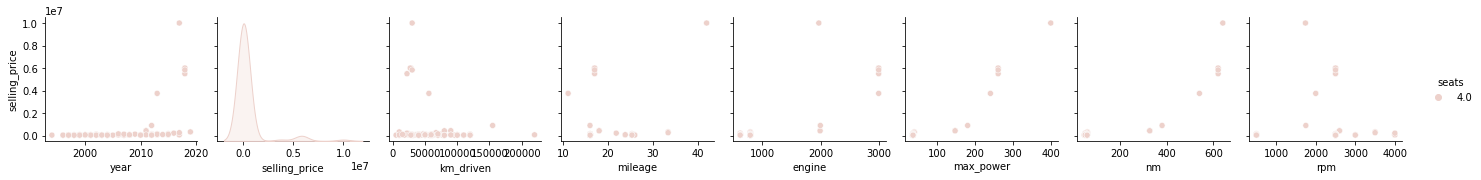

Доля от Датасета 0.01


<Figure size 432x288 with 0 Axes>

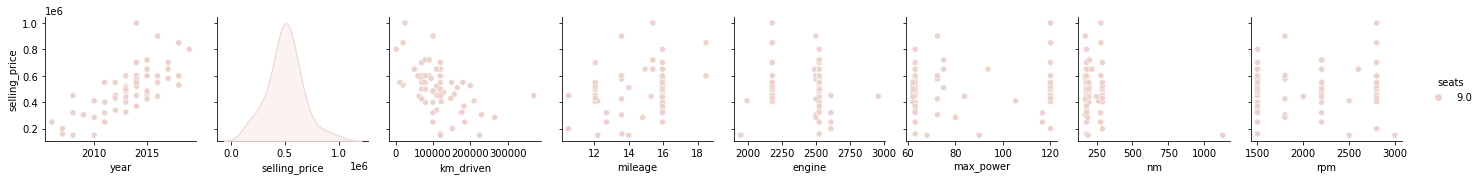

Доля от Датасета 0.01


<Figure size 432x288 with 0 Axes>

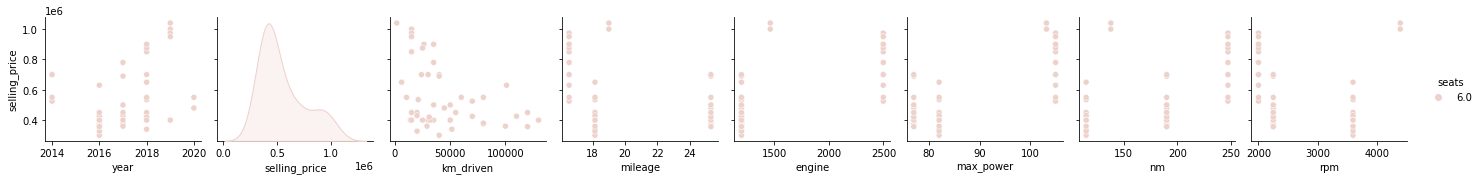

Доля от Датасета 0.0


<Figure size 432x288 with 0 Axes>

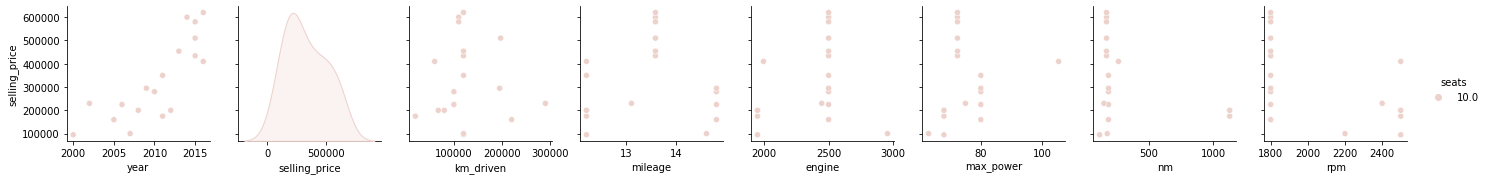

Доля от Датасета 0.0


<Figure size 432x288 with 0 Axes>

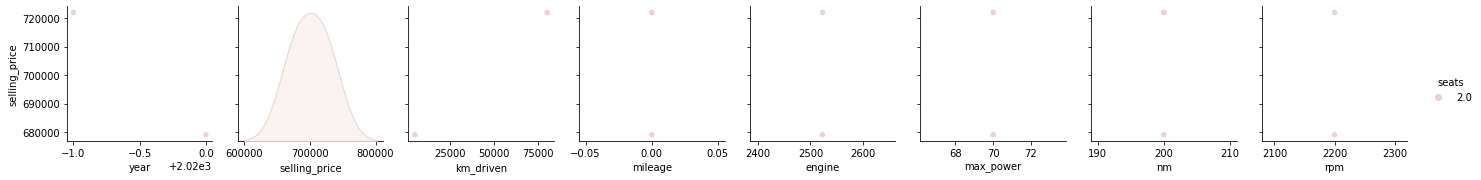

Доля от Датасета 0.0


<Figure size 432x288 with 0 Axes>

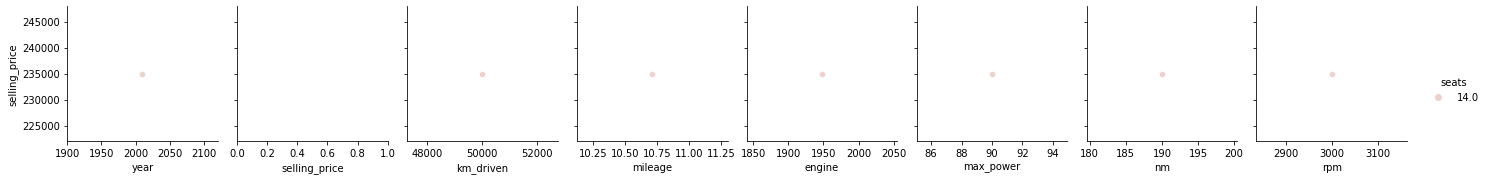

In [ ]:
df_train_4pair = df_train.copy()
for seat in df_train_4pair['seats'].value_counts().index:
    plt.figure()
    loc_df = df_train_4pair[df_train_4pair['seats'] == seat]
    print('Доля от Датасета', round(len(loc_df)/len(df_train_4pair), 2))
    sns.pairplot(loc_df.drop(columns = ['name', 'seller_type', 'transmission', 'owner']),
             hue = 'seats', y_vars = ['selling_price'])
    plt.show()

In [ ]:
df_train_4pair = df_train.copy()
print(df_train_4pair.corr()['km_driven']['selling_price'])
df_train_4pair['km_driven'] = df_train_4pair['km_driven'].apply(lambda x: x**(1/10))
print(df_train_4pair.corr()['km_driven']['selling_price'])
print('Отсюда видно два факта: то что бОльшую часть занимают 5 и 4 сидений') 
print('И на распределение смотреть нужно в этих разрезах')
print('Также явно видно, что можно позаниматься фича-инженерингом чтобы повысить')
print('Линейную корреляюци')

-0.1648284702628046
-0.245784074890935
Отсюда видно два факта: то что бОльшую часть занимают 5 и 4 сидений
И на распределение смотреть нужно в этих разрезах
Также явно видно, что можно позаниматься фича-инженерингом чтобы повысить
Линейную корреляюци


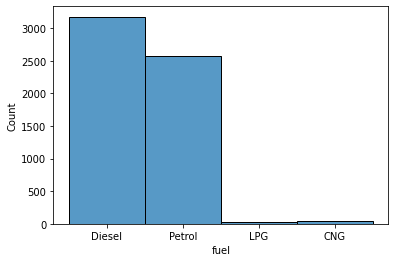

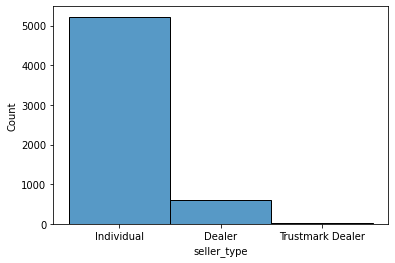

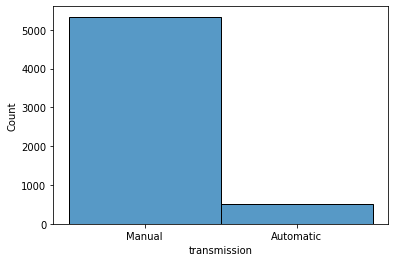

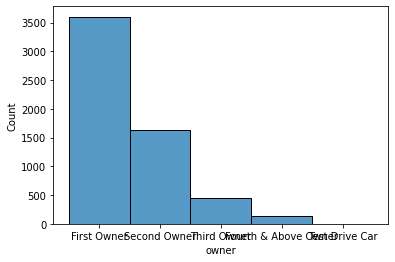

In [ ]:
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    plt.plot(figsize=(30,8))
    sns.histplot(df_train[col])
    plt.show()

In [ ]:
print('Тут можно ознакомиться с дизбалансом классов в категориях')

Тут можно ознакомиться с дизбалансом классов в категориях


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
cols = ['mileage', 'engine', 'max_power', 'seats']
for col in cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())


In [ ]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns = ['fuel', 'seller_type', 'transmission', 'owner', 'name',
                                   'selling_price'])

In [ ]:
assert X_train.shape == (5840, 8)

In [ ]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns = ['fuel', 'seller_type', 'transmission', 'owner', 'name',
                                   'selling_price'])

In [ ]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
def get_res(model):
    m = model
    m.fit(X_train, y_train)
    print(
        round(r2_score(y_test, m.predict(X_test)), 2),
        round(MSE(y_test, m.predict(X_test)), 2)
    )
    print(
        round(r2_score(y_train, m.predict(X_train)), 2),
        round(MSE(y_train, m.predict(X_train)), 2)
    )
    return m

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = get_res(LinearRegression())

0.6 229583432334.75
0.6 114298436567.42


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler
train_scaler = StandardScaler().fit(X_train)
X_train = train_scaler.transform(X_train)
X_test = train_scaler.transform(X_test)

In [ ]:
linreg_scaled = get_res(LinearRegression())

0.6 229583432334.74
0.6 114298436567.42


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
for i,v in enumerate(linreg_scaled.coef_):
    print(v,
          df_train.drop(columns = ['fuel', 'seller_type', 'transmission', 'owner', 'name',
                                   'selling_price']).columns[i])

165788.70801944323 year
-48799.765968246385 km_driven
-8785.018377047068 mileage
22211.812353041645 engine
329214.7933935939 max_power
-30098.941194474555 seats
7908.764904828933 nm
-59117.91353172375 rpm


In [ ]:
print('Год и макс павер')

Год и макс павер


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

lasso_scaled = get_res(Lasso())

0.6 229584146799.86
0.6 114298436579.71


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
for i in lasso_scaled.coef_:
    print(float(i))
#Не занулила, потому что ни одна фича не показалась Лассо с дефолтными 
#параметрами полностью бесполезной

165786.66404846773
-48798.85247374613
-8781.823722888312
22210.248392967755
329215.97322781844
-30095.23677479647
7908.037297067115
-59115.84026177929


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
lasso_gs = get_res(GridSearchCV(Lasso(),
                     {'alpha':np.arange(0.1, 1.6, 0.1),
                      'tol':[1e-7, 1e-6, 1e-5],
                      'max_iter':[(i+1)*1000 for i in range(10)]},
                     cv=10,
                     verbose=2))
# your code here

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-07; total time=   0.0s
[CV] END ................alpha=0.1, max_iter=1000, tol=1e-06; total time=   0.0s
[CV] END ................alpha=0.1, max_iter

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [ ]:
print(4500)

4500


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
print(lasso_gs.best_params_)
print('не занулились',
      lasso_gs.best_estimator_.coef_)

{'alpha': 1.5000000000000002, 'max_iter': 1000, 'tol': 1e-07}
не занулились [165785.29777749 -48798.38873805  -8779.89525428  22208.96303078
 329216.86840308 -30092.96680408   7907.78735473 -59114.72544347]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_gs = get_res(GridSearchCV(ElasticNet(),
                     {'alpha':np.arange(0.5, 0.7, 0.025),
                      'l1_ratio':np.arange(0.7, 0.9, 0.05),
                      'max_iter':[(i+1)*1000 for i in range(10)]},
                     cv=10,
                     verbose=2))

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=1000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.7, max_iter=2000; total time=   0.0s
[CV] END .............alpha=0.5, l1_ratio=0.

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
elastic_gs.best_params_

{'alpha': 0.55, 'l1_ratio': 0.8, 'max_iter': 1000}

In [ ]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,nm,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.70,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.80,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0,96.10,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,90.00,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,113.70,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,235.40,2750.0


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
X_train_cat = df_train.drop(columns = ['name', 'selling_price'])
X_test_cat = df_test.drop(columns = ['name', 'selling_price'])

In [ ]:
assert X_train_cat.shape == (5840, 12)

In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
# Тут сразу на будущее пайплайн и с OHE и с Нормализацией
def my_pipeline(base_model,
                numeric_features,
                categorical_features):

    

    numeric_transformer = Pipeline(
        steps=[("scaler", StandardScaler())]
    )

    categorical_transformer = OneHotEncoder(drop = 'first', handle_unknown="ignore")

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    pipelin = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", base_model)
        ]
    )
    return pipelin

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
numeric_features = ["year", "km_driven", 'mileage',
                        'engine', 'max_power', 'nm', 'rpm']
categorical_features = ["fuel", "seller_type", "transmission", 'owner',
                        'seats']
clf = my_pipeline(
         GridSearchCV(Ridge(),
                      param_grid = {'alpha':np.arange(0.1, 0.5, 0.1)},
                      scoring = 'r2',
                      cv = 10),
        numeric_features,
        categorical_features
)
clf.fit(X_train_cat, y_train)
print("model score: %.3f" % clf.score(X_test_cat, y_test))

model score: 0.636


In [ ]:
print('не улучшилось')

не улучшилось


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
from sklearn.linear_model import\
HuberRegressor, RANSACRegressor, TheilSenRegressor

df_train_fe = df_train.copy(deep=True)
df_test_fe = df_test.copy(deep=True)
numeric_features = ["year", "km_driven", 'mileage',
                        'engine', 'max_power', 'nm', 'rpm']
categorical_features = ["fuel", "seller_type", "transmission", 'owner',
                        'seats', 'manufacturer']

# ЛОГ МОДЕЛЕЙ

ridg = GridSearchCV(Ridge(),
                      param_grid = {'alpha':np.arange(0.1, 1.5, 0.1)},
                      scoring = 'r2',
                      cv = 10)

hub = GridSearchCV(HuberRegressor(),
                      param_grid = {'epsilon':np.arange(7.5, 7.6, 0.01)},
                      scoring = 'r2',
                      cv = 10)

#Объявление модели

clf = my_pipeline(
         ridg,
        numeric_features,
        categorical_features
)

def pre_pipeline_process(df):
    #производитель
    df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])
    df['year'] = df['year'].apply(lambda x: x**2)
    #df['horse_volume'] = df['max_power'] * df['engine']
    return df.replace([np.inf, -np.inf], 0)

X_train = pre_pipeline_process(df_train_fe).drop(columns=['selling_price'])
y_train = pre_pipeline_process(df_train_fe)['selling_price'].apply(lambda x: np.log(x))

X_test = pre_pipeline_process(df_test_fe).drop(columns=['selling_price'])
y_test = pre_pipeline_process(df_test_fe)['selling_price'].apply(lambda x: np.log(x))


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))



model score: 0.914


In [ ]:
X_train.to_csv('train.csv', index='id')

## Тут буду писать логи

### 1)Добавил производителя, R2 взлетел с 0.63 до 0.775
### 2)Логарифмировал фичи которые сильно вправо влево распространены ухудшилось до 0.75(((((((((
### 3)Поискал робаст модели, выбрал хубера этого, оказалось очень важны гиперпараметры - дефолтные дали 0.59 (хуже бейзлайна), но подтюнив чуть чуть дал 0.7
### 4)Логарифмирование и робаст в помойку - возвращаюсь к просто производителю
### 5)Квадрат года не поменял ничего, ни р2 ни бизнесовую (кстати уже на этом этапе 300/1000 бизнесовая метрика, а коллеги по цеху говорят о том что у них 0.21, и я думаю, стоит ли вообще что-либо ещё пытаться...)
### 6)Перебрал другие робаст модельки, которые были в линеар_моделс, но потратил кучу времени на теилсен из за формата данных, а результаты не улучшились. Оставляем РИДЖ) P.S. я просто не стал тратить много времени на тюнинг этих робасток, возможно есть наборы гиперпараметров, где есть лучше P.S.S. У RANSAC хоть и ужасный R^2, но вот бизнесовая всё равно больше, чем у коллег - хе хе 
### 7)Перебробовал много - сдался начал смотреть в подсказки - сделал произведение лошадок на объём двигателя - и теперь 0.778 R^2 (Максимум пока что) но вот бизнесовая упала на 15 машин
### 8)Попытался нумерики клипануть 0.9 квантилем - 0.68.... БРЕД!
### 9)Пока гуглил аутлаер хендлинг ин регрешн наткнулся на старые статьи по эконометрике в R и вспомнил что логарифмировать можно не только Х......ЭВРИКА 0.91 R2 и 0.345 Бизнесовая - я считаю что это победа для страны.


In [ ]:
import pickle
inference = {'cat_names':categorical_features,
             'num_names':numeric_features,
             'model':clf.named_steps['regressor'],
             'preprocessors': {'scaler_fit':clf.named_steps['preprocessor'].transformers_[0][1]['scaler'],
                               'ohe_fit': clf.named_steps['preprocessor'].transformers_[1][1]},
             'shape_df':X_train.iloc[0:1],
             'pipeline':clf
             }
with open('inference_info.pickle', 'wb') as handle:
    pickle.dump(inference, handle)

with open('inference_info.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
X_train.iloc[0].to_json()

'{"name":"Maruti Swift Dzire VDI","year":4056196,"km_driven":145500,"fuel":"Diesel","seller_type":"Individual","transmission":"Manual","owner":"First Owner","mileage":23.4,"engine":1248.0,"max_power":74.0,"seats":5.0,"nm":190.0,"rpm":2000.0,"manufacturer":"Maruti"}'

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    cnt = 0
    for i,v in enumerate(y_true):
        if abs(np.exp(v) - np.exp(y_pred[i])) / np.exp(v) < 0.1:
            cnt += 1
    return cnt/len(y_pred)

business_metrics(y_test, clf.predict(X_test))

0.345